Object Detection models

Yolo

In [1]:
import time

In [2]:
#small yolo with ap 28.7
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

fyt = YolosFeatureExtractor.from_pretrained('hustvl/yolos-tiny')
model_yolo_tiny = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')

inputs = fyt(images=image, return_tensors="pt")
start = time.time()
outputs = model_yolo_tiny(**inputs)
lat = time.time() - start
# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes
print(lat)

0.19916677474975586


In [3]:
logits

tensor([[[-39.5022, -11.9821, -17.6888,  ..., -28.9920, -32.4942,  -3.1787],
         [-29.9574,  -9.9769, -17.7690,  ..., -22.2706, -12.0684,   1.2034],
         [-42.3282, -20.7200, -30.6295,  ..., -20.6833, -18.1521,  -8.2005],
         ...,
         [-19.9590,  -5.1274, -12.4971,  ..., -11.2616,  -7.0680,   1.4878],
         [-24.8675,  -7.5970, -12.7446,  ..., -17.4652, -19.4699,   0.5323],
         [-32.3566, -11.9000, -18.2876,  ..., -20.0035, -15.4268,  -0.1216]]],
       grad_fn=<ViewBackward0>)

model.history

In [4]:
from transformers import DetrFeatureExtractor, DetrForObjectDetection
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

fr101 = DetrFeatureExtractor.from_pretrained('facebook/detr-resnet-101')
model_resnet_101 = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-101')

inputs = fr101(images=image, return_tensors="pt")
start = time.time()
outputs = model_resnet_101(**inputs)
print(time.time() - start)
# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes

1.1882739067077637


In [5]:
type(model)

NameError: name 'model' is not defined

In [6]:
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

fyb = YolosFeatureExtractor.from_pretrained('hustvl/yolos-base')
model_yolo_base = YolosForObjectDetection.from_pretrained('hustvl/yolos-base')

inputs = fyb(images=image, return_tensors="pt")
outputs = model_yolo_base(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes

In [7]:
from transformers import YolosFeatureExtractor, YolosForObjectDetection
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

fys = YolosFeatureExtractor.from_pretrained('hustvl/yolos-small')
model_yolo_small = YolosForObjectDetection.from_pretrained('hustvl/yolos-small')

inputs = fys(images=image, return_tensors="pt")
outputs = model_yolo_small(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes


In [8]:
from transformers import DetrFeatureExtractor, DetrForObjectDetection
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

fr50 = DetrFeatureExtractor.from_pretrained('facebook/detr-resnet-50')
model_resnet_50 = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')

inputs = fr50(images=image, return_tensors="pt")
outputs = model_resnet_50(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes



In [18]:
models = ['yolo_tiny', 'yolo_small', 'yolo_base', 'detr_resnet_50', 'detr_resnet_101']
aps = [28.7,36.1,42,42,43.5]
aps = [ap/100 for ap in aps]


In [ ]:
latency = []

In [10]:
model_code = [model_yolo_tiny, model_yolo_small, model_yolo_base,model_resnet_50,model_resnet_101 ]
feature_extractor = [fyt, fys, fyb, fr50, fr101]

In [11]:
for i in range(len(models)):
    inputs = feature_extractor[i](images=image, return_tensors="pt")
    total_lat = 0
    model = model_code[i]
    for k in range(1000):
        start = time.time()
        outputs = model(**inputs)
        total_lat += (time.time() - start)
        if k %100 == 0:
            print(f"k is {k}")
    lat = total_lat / 1000
    print(lat)
    latency.append(lat)

k is 0
k is 100
k is 200
k is 300
k is 400
k is 500
k is 600
k is 700
k is 800
k is 900
0.11103990054130554
k is 0
k is 100
k is 200
k is 300
k is 400
k is 500
k is 600
k is 700
k is 800
k is 900
1.370058268070221
k is 0
k is 100
k is 200
k is 300
k is 400
k is 500
k is 600
k is 700
k is 800
k is 900
2.928552621603012
k is 0
k is 100
k is 200
k is 300
k is 400
k is 500
k is 600
k is 700
k is 800
k is 900
0.3453620865345001
k is 0
k is 100
k is 200
k is 300
k is 400
k is 500
k is 600
k is 700
k is 800
k is 900
0.519926659822464


In [14]:
print(len(latency), len(aps))

5 5


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]


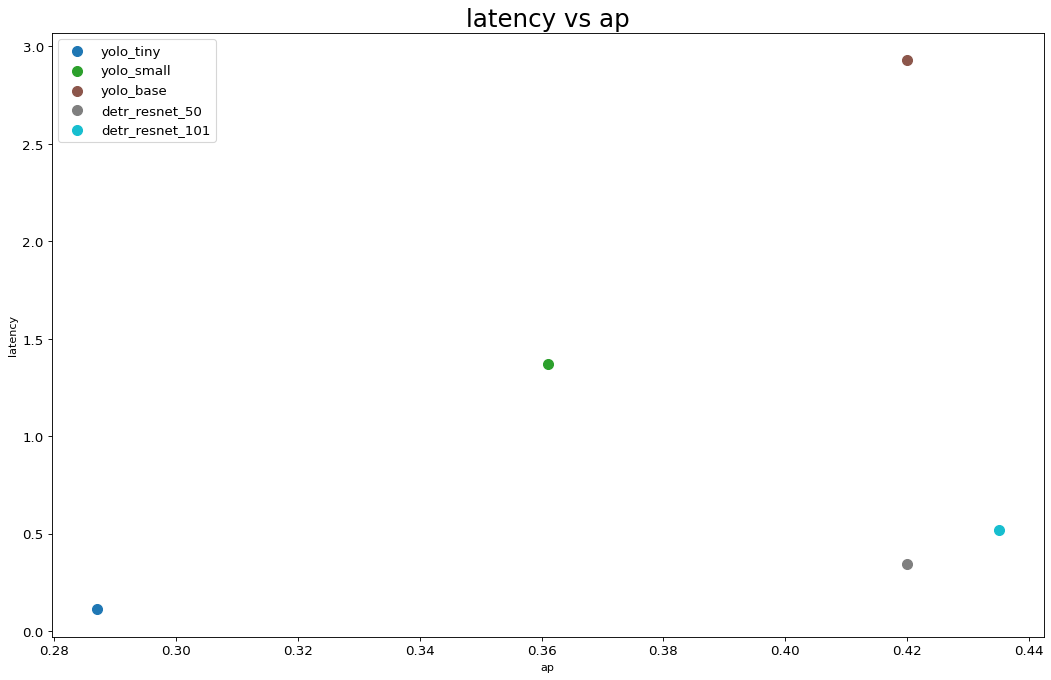

In [21]:
from matplotlib import pyplot as plt
colors = [plt.cm.tab10(i/float(len(models)-1)) for i in range(len(models))]
print(colors)
# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, model in enumerate(models):
    plt.scatter(aps[i], latency[i], 
                s=80, c=colors[i], label=str(model))

# Decorations
plt.gca().set(xlabel='ap', ylabel='latency')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("latency vs ap", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    


In [22]:
file_name = 'model.onxx'

In [23]:
model_resnet_101.save_pretrained(save_directory = '.',file_name=file_name )

TypeError: save_pretrained() missing 1 required positional argument: 'save_directory'